In [85]:
import tensorflow as tf
import zipfile, os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [19]:
base_dir = 'fruits/'
test_dir = os.path.join(base_dir, 'test')
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'valid')

In [3]:
os.listdir(train_dir)

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']

In [4]:
os.listdir(val_dir)

['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, #menormalisasi gambar menjadi bentuk piksel 
    rotation_range = 20, #rotasi gambar hingga 20 derajat
    horizontal_flip = True,  #putar balik gambar secara horizontal
    shear_range = 0.2,  #pemangkasan gambar hingga 0.2 kali ukuran 
    fill_mode = 'nearest'  #mengisi piksel yang kosong dengan piksel terisi
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [6]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),  
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150), 
    batch_size = 32,
    class_mode = 'categorical'
)

Found 9000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(512, activation= 'relu'),
    tf.keras.layers.Dense(5, activation= 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [8]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [9]:
print(train_generator.class_indices)

{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}


In [11]:
model.fit(
    train_generator,
    steps_per_epoch = train_generator.n // train_generator.batch_size, 
    epochs = 25,
    validation_data = validation_generator, 
    validation_steps = validation_generator.n // validation_generator.batch_size,
    callbacks = [callbacks]
)

Epoch 1/25
281/281 [==============================] - 370s 1s/step - loss: 1.2239 - accuracy: 0.4807 - val_loss: 0.9744 - val_accuracy: 0.5817
Epoch 2/25
281/281 [==============================] - 370s 1s/step - loss: 1.0045 - accuracy: 0.5870 - val_loss: 1.0913 - val_accuracy: 0.5312
Epoch 3/25
281/281 [==============================] - 366s 1s/step - loss: 0.9335 - accuracy: 0.6252 - val_loss: 0.8687 - val_accuracy: 0.6371
Epoch 4/25
281/281 [==============================] - 364s 1s/step - loss: 0.8894 - accuracy: 0.6465 - val_loss: 0.8719 - val_accuracy: 0.6290
Epoch 5/25
281/281 [==============================] - 368s 1s/step - loss: 0.8491 - accuracy: 0.6670 - val_loss: 0.8129 - val_accuracy: 0.6784
Epoch 6/25
281/281 [==============================] - 365s 1s/step - loss: 0.7992 - accuracy: 0.6897 - val_loss: 0.7887 - val_accuracy: 0.6986
Epoch 7/25
281/281 [==============================] - 369s 1s/step - loss: 0.7630 - accuracy: 0.7141 - val_loss: 0.8827 - val_accuracy: 0.6462

In [77]:
def predict_label(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    # Lakukan prediksi menggunakan model klasifikasi
    predictions = model.predict(img_array)
    index = np.argmax(predictions)
    labels = ['Apple', 'Banana', 'Grape', 'Mango', 'Strawberry']
    predicted_label = labels[index]
    
    return predicted_label

In [89]:
def show_image(image_path, label):
    # Membaca gambar dari path
    img = image.load_img(image_path)
    img_array = image.img_to_array(img)

    # Menampilkan gambar
    plt.imshow(img_array.astype(np.uint8))

    # Menambahkan label pada gambar
    plt.text(10, 10, label, color='white', fontsize=12, bbox=dict(facecolor='black', alpha=0.8))

    # Menghilangkan sumbu x dan y
    plt.axis('off')

    # Menampilkan gambar dengan label
    plt.show()

1/1 [==============================] - 0s 39ms/step


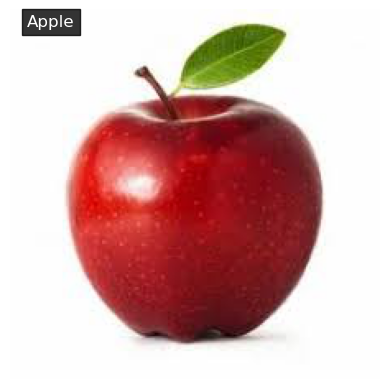

In [90]:
# Ambil gambar secara manual
image_path = test_dir + '/Apple (1750).jpeg'

predicted_label = predict_label(image_path)
show_image(image_path, predicted_label)
